In [277]:
import pandas as pd
import numpy as np
import tweepy
import requests
import os
from PIL import Image
from io import BytesIO
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline


# Gathering Data

In [278]:
#reading the first file twitter-archive-enhanced
df = pd.read_csv('twitter-archive-enhanced.csv')

In [279]:
#getting the second file from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
dfimage = 'image-predictions.tsv'
response = requests.get(url)

if not os.path.isfile(dfimage):
    with open(dfimage, 'wb') as f:
        f.write(response.content)
#or if yoyalready have the file
dfimage1 = pd.read_csv('image-predictions.tsv',sep='\t')        
dfimage1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [280]:
#gathering important information from tweet file
df_list = []
with open('tweet_json.txt', 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count ,
                       'user_count': user_count})
        
dfApi = pd.DataFrame(df_list)

In [281]:
#First of all we have to copy this files to save the source
archive = df.copy()
dfimage = dfimage1.copy()

# Assessing Data

1- The visual assessment done on the Windows Excel sheet.


2- The programmatically assessment done on Jupyter notebook by
pandas functions such .info () .head () etc...

In [282]:
archive.head()
archive.info()
archive['retweeted_status_id'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [283]:
dfimage.head()
dfimage.info()
dfimage.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [284]:
dfApi.head()
dfApi.info()
dfApi.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


,tweet_id,retweet_count,favorite_count,user_count
1872,675135153782571009,542,1398,3201003


Data Issues

tidiness issues

-dropping doggo, floofer, pupper and puppo columns and adding a new column that called dog_stage.


-merging all the dataframes that called twitter_archive_master.

inconsistence and missing data 

-separating between concatenated values in dog_stage column in
archive table by '_'.

-fixing different entries like None and NaN values in archive
table (inconsistence issue).

-dropping tweets that have no images (validity issue).

-getting the real tweets from dfimage table (Accuracy issue).

-replacing NaN values in name column in archive table to Dog
(completeness issue).

-checking rating_denominator values in archive table (Accuracy
issue).

-replacing columns names in dfimage1 table (Accuracy issue).

-fixing some incorrect value (like a value) in name column in
archive table (validity issue).

-dropping duplicates in twitter_archive_master table.

# Data cleaning

1-Define: dropping doggo, floofer, pupper and puppo columns

In [285]:
archive['doggo']=archive['doggo'].replace('None','')
archive['floofer']=archive['floofer'].replace('None','')
archive['pupper']=archive['pupper'].replace('None','')
archive['puppo']=archive['puppo'].replace('None','')
archive['dog_stage'] = archive.doggo + archive.floofer + archive.pupper + archive.puppo
archive.pop('doggo')
archive.pop('floofer')
archive.pop('pupper')
archive.pop('puppo')
archive['dog_stage']=archive['dog_stage'].replace('','NaN')       
#test
archive['dog_stage'].value_counts()

NaN             1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

1-Define: separating between concatenated values in dog_stage
column in archive table by '_'.

In [286]:
archive.loc[archive['dog_stage']=='doggopupper','dog_stage']='doggo_pupper'
archive.loc[archive['dog_stage']=='doggofloofer','dog_stage']='doggo_floofer'
archive.loc[archive['dog_stage']=='doggopuppo','dog_stage']='doggo_puppo' 
#test
archive['dog_stage'].value_counts()

NaN              1976
pupper            245
doggo              83
puppo              29
doggo_pupper       12
floofer             9
doggo_puppo         1
doggo_floofer       1
Name: dog_stage, dtype: int64

2-Define: fixing different entries like None and NaN values in archive
table (inconsistence issue).

In [287]:
archive['dog_stage']=archive['dog_stage'].replace('','NaN')       
#test
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

3-Define: dropping tweets that have no images (validity issue).


In [288]:
tweets_with_image = list(dfimage.tweet_id.unique())
len(tweets_with_image) == archive.tweet_id.isin(tweets_with_image).sum()
archive = archive[archive.tweet_id.isin(tweets_with_image)]
retweet_entries = archive.retweeted_status_id.notnull()
archive[retweet_entries].shape[0]


#test
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  dog_stage                   2075 

4-Define: getting the real tweets from dfimage table (Accuracy issue)

In [289]:
archive = archive[~retweet_entries]
np.logical_not(dfimage.tweet_id.isin(list(archive.tweet_id)))
dfimage[~np.logical_not(dfimage.tweet_id.isin(list(archive.tweet_id)))]
#test
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  dog_stage                   1994 

5-Define: replacing NaN values in name column in archive table to Dog
(completeness issue).

In [290]:
archive['name']=archive['name'].replace('None','Dog')
#test
archive['name'].value_counts()

Dog        546
a           55
Charlie     11
Oliver      10
Lucy        10
          ... 
Blitz        1
Hamrick      1
Grady        1
Julio        1
Blue         1
Name: name, Length: 936, dtype: int64

6-Define: checking rating_denominator values in archive table (Accuracy
issue).

In [291]:
#I used this lines to know the value of rating_denominator
#(df['rating_denominator']!=10).sum()
#df.loc[2335].expanded_urls
archive.loc[archive['tweet_id']==832088576586297345,'rating_denominator']=15
archive.loc[archive['tweet_id']==820690176645140481,'rating_denominator']=10
archive.loc[archive['tweet_id']==810984652412424192,'rating_denominator']=7
archive.loc[archive['tweet_id']==775096608509886464,'rating_denominator']=11
archive.loc[archive['tweet_id']==758467244762497024,'rating_denominator']=10
archive.loc[archive['tweet_id']==740373189193256964,'rating_denominator']=11
archive.loc[archive['tweet_id']==731156023742988288,'rating_denominator']=11
archive.loc[archive['tweet_id']==722974582966214656,'rating_denominator']=10
archive.loc[archive['tweet_id']==716439118184652801,'rating_denominator']=10
archive.loc[archive['tweet_id']==713900603437621249,'rating_denominator']=12
archive.loc[archive['tweet_id']==710658690886586372,'rating_denominator']=10
archive.loc[archive['tweet_id']==709198395643068416,'rating_denominator']=10
archive.loc[archive['tweet_id']==704054845121142784,'rating_denominator']=10
archive.loc[archive['tweet_id']==697463031882764288,'rating_denominator']=10
archive.loc[archive['tweet_id']==684222868335505415,'rating_denominator']=10
archive.loc[archive['tweet_id']==682962037429899265,'rating_denominator']=11
archive.loc[archive['tweet_id']==677716515794329600,'rating_denominator']=10
archive.loc[archive['tweet_id']==675853064436391936,'rating_denominator']=10
archive.loc[archive['tweet_id']==666287406224695296,'rating_denominator']=10
archive.loc[archive['tweet_id']==810984652412424192,'rating_denominator']=7
archive.loc[archive['tweet_id']==740373189193256964,'rating_denominator']=11
archive.loc[archive['tweet_id']==731156023742988288,'rating_denominator']=11
archive.loc[archive['tweet_id']==713900603437621249,'rating_denominator']=12
archive.loc[archive['tweet_id']==682962037429899265,'rating_denominator']=11
#test
(archive[archive['rating_denominator']!=10]).head(23)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,Dog,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,11,this,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,12,Dog,NaN
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,Dog,NaN
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,NaN


7-Define: checking rating_numerator values in archive table (Accuracy
issue).

In [292]:
#I used this line to know the value of rating_numerator
#archive.loc[2355].rating_numerator
archive.loc[archive['tweet_id']==832215909146226688,'rating_numerator']=10
archive.loc[archive['tweet_id']==820690176645140481,'rating_numerator']=14
archive.loc[archive['tweet_id']==810984652412424192,'rating_numerator']=14
archive.loc[archive['tweet_id']==778027034220126208,'rating_numerator']=12
archive.loc[archive['tweet_id']==758467244762497024,'rating_numerator']=15
archive.loc[archive['tweet_id']==749981277374128128,'rating_numerator']=10
archive.loc[archive['tweet_id']==731156023742988288,'rating_numerator']=12
archive.loc[archive['tweet_id']==716439118184652801,'rating_numerator']=11
archive.loc[archive['tweet_id']==713900603437621249,'rating_numerator']=11
archive.loc[archive['tweet_id']==710658690886586372,'rating_numerator']=10
archive.loc[archive['tweet_id']==709198395643068416,'rating_numerator']=9
archive.loc[archive['tweet_id']==704054845121142784,'rating_numerator']=12
archive.loc[archive['tweet_id']==697463031882764288,'rating_numerator']=11
archive.loc[archive['tweet_id']==684225744407494656,'rating_numerator']=11
archive.loc[archive['tweet_id']==684222868335505415,'rating_numerator']=11
archive.loc[archive['tweet_id']==680494726643068929,'rating_numerator']=12
archive.loc[archive['tweet_id']==677716515794329600,'rating_numerator']=14
archive.loc[archive['tweet_id']==675853064436391936,'rating_numerator']=11
archive.loc[archive['tweet_id']==786709082849828864,'rating_numerator']=10
archive.loc[archive['tweet_id']==883482846933004288,'rating_numerator']=14
archive.loc[archive['tweet_id']==835152434251116546,'rating_numerator']=11
archive.loc[archive['tweet_id']==781661882474196992,'rating_numerator']=6
archive.loc[archive['tweet_id']==757596066325864448,'rating_numerator']=6
archive.loc[archive['tweet_id']==751583847268179968,'rating_numerator']=6
archive.loc[archive['tweet_id']==747816857231626240,'rating_numerator']=6
archive.loc[archive['tweet_id']==722974582966214656,'rating_numerator']=14
archive.loc[archive['tweet_id']==711306686208872448,'rating_numerator']=6
archive.loc[archive['tweet_id']==694925794720792577,'rating_numerator']=6
archive.loc[archive['tweet_id']==691483041324204033,'rating_numerator']=6
archive.loc[archive['tweet_id']==675135153782571009,'rating_numerator']=6
# test
(archive['rating_numerator']<6).sum()
(archive['rating_numerator']>15).sum()

1

8-Define: replacing columns names in dfimage1 table (Accuracy issue).

In [293]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
dfimage1.columns = cols
#test
dfimage1.head()


,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


9-Define: fixing some incorrect value (like a value) in name column in
archive table (validity issue).

In [294]:
#I used this column to know the name value
#archive.loc[2314].name
archive.loc[archive['tweet_id']==885518971528720385,'name']='Howard'
archive.loc[archive['tweet_id']==666781792255496192,'name']='Octaviath'
archive.loc[archive['tweet_id']==671743150407421952,'name']='Jacob'
archive.loc[archive['tweet_id']==671147085991960577,'name']='Rufus'
archive.loc[archive['tweet_id']==670427002554466305,'name']='Spork'
archive.loc[archive['tweet_id']==670361874861563904,'name']='Cherokee'
archive.loc[archive['tweet_id']==670303360680108032,'name']='Hemry'
archive.loc[archive['tweet_id']==669923323644657664,'name']='Alphred'
archive.loc[archive['tweet_id']==669564461267722241,'name']='Alfredo'
archive.loc[archive['tweet_id']==668955713004314625,'name']='Leroi'
archive.loc[archive['tweet_id']==668507509523615744,'name']='Chuk'
archive.loc[archive['tweet_id']==668171859951755264,'name']='Alfonso'
archive.loc[archive['tweet_id']==667861340749471744,'name']='Cheryl'
archive.loc[archive['tweet_id']==667773195014021121,'name']='Jessiga'
archive.loc[archive['tweet_id']==667538891197542400,'name']='Klint'
archive.loc[archive['tweet_id']==667470559035432960,'name']='Kohl'
archive.loc[archive['tweet_id']==666983947667116034,'name']='Pepe'
archive.loc[archive['tweet_id']==666781792255496192,'name']='Octaviath'
archive.loc[archive['tweet_id']==666701168228331520,'name']='Johm'
#test
archive['name'].value_counts()

Dog        546
a           38
Charlie     11
Oliver      10
Cooper      10
          ... 
Brudge       1
Hurley       1
Pinot        1
Jarod        1
Stark        1
Name: name, Length: 950, dtype: int64

2-merging all the dataframes.

In [295]:
datafarames=[archive,dfimage,dfApi]
twitter_archive_master= pd.concat(datafarames)
#test
twitter_archive_master.head(100)
#twitter_archive_master.info()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,user_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,870063196459192321,NaN,NaN,2017-05-31 23:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870063196...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,869772420881756160,NaN,NaN,2017-05-31 04:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dewey (pronounced ""covfefe""). He's hav...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/869772420...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,869702957897576449,NaN,NaN,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


10-Define:dropping duplicates in twitter_archive_master table

In [296]:
twitter_archive_master.drop_duplicates(subset=['tweet_id'],keep=False,inplace=True)
#test
twitter_archive_master['tweet_id'].duplicated().sum()

0

saving the new files

In [297]:
archive.to_csv("archive.csv")
dfimage.to_csv("dfimage.csv")
dfApi.to_csv("dfApi.csv")
twitter_archive_master.to_csv('twitter_archive_master.csv')

visualizations

Text(0.5, 1.0, 'Rating versus Time')

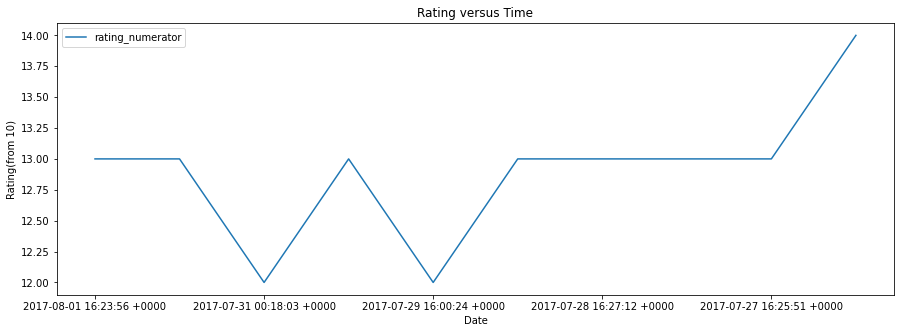

In [298]:
archive[:10].plot(kind='line',x='timestamp',y='rating_numerator',figsize=(15,5));
plt.xlabel('Date')
plt.ylabel('Rating(from 10)')
plt.title('Rating versus Time')

<AxesSubplot:title={'center':'classifications dog stages by names'}, xlabel='dog_stage', ylabel='count names'>

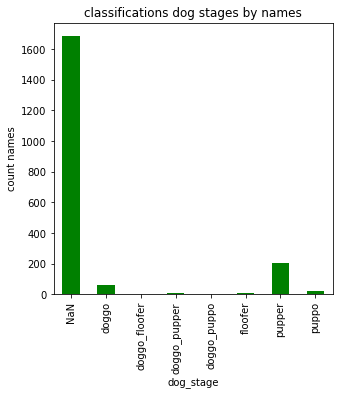

In [299]:
classifications = archive.groupby('dog_stage').count()['name']
classifications.plot(kind='bar',color='green',title='classifications dog stages by names',xlabel='dog_stage',ylabel='count names',figsize=(5,5))

<AxesSubplot:title={'center':'Dogs and thir rating values'}, xlabel='Dogs_names', ylabel='Rating'>

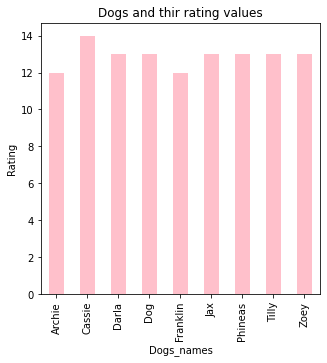

In [300]:
names = archive[:10].groupby('name').mean()['rating_numerator']
names.plot(kind='bar',color='pink',title='Dogs and thir rating values',xlabel='Dogs_names',ylabel='Rating',figsize=(5,5))